In [1]:
import pandas as pd

# Завантаження датасету
df = pd.read_csv("..\\data\\xAPI-Edu-Data.csv")
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [2]:
# Визначаємо цільову змінну (успішність студента)
y = df["Class"]
X = df.drop(columns=["Class"])

In [3]:
from sklearn.preprocessing import LabelEncoder

# Закодуємо категоріальні змінні
label_encoders = {}
for col in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [4]:
from sklearn.model_selection import train_test_split

# Розділення на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Побудова моделі дерева рішень
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Прогнозування
y_pred = clf.predict(X_test)

# Оцінка моделі
accuracy = accuracy_score(y_test, y_pred)
print(f"Точність моделі: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Точність моделі: 0.8438
              precision    recall  f1-score   support

           H       0.79      0.86      0.83        22
           L       0.88      0.85      0.86        26
           M       0.85      0.83      0.84        48

    accuracy                           0.84        96
   macro avg       0.84      0.85      0.84        96
weighted avg       0.85      0.84      0.84        96



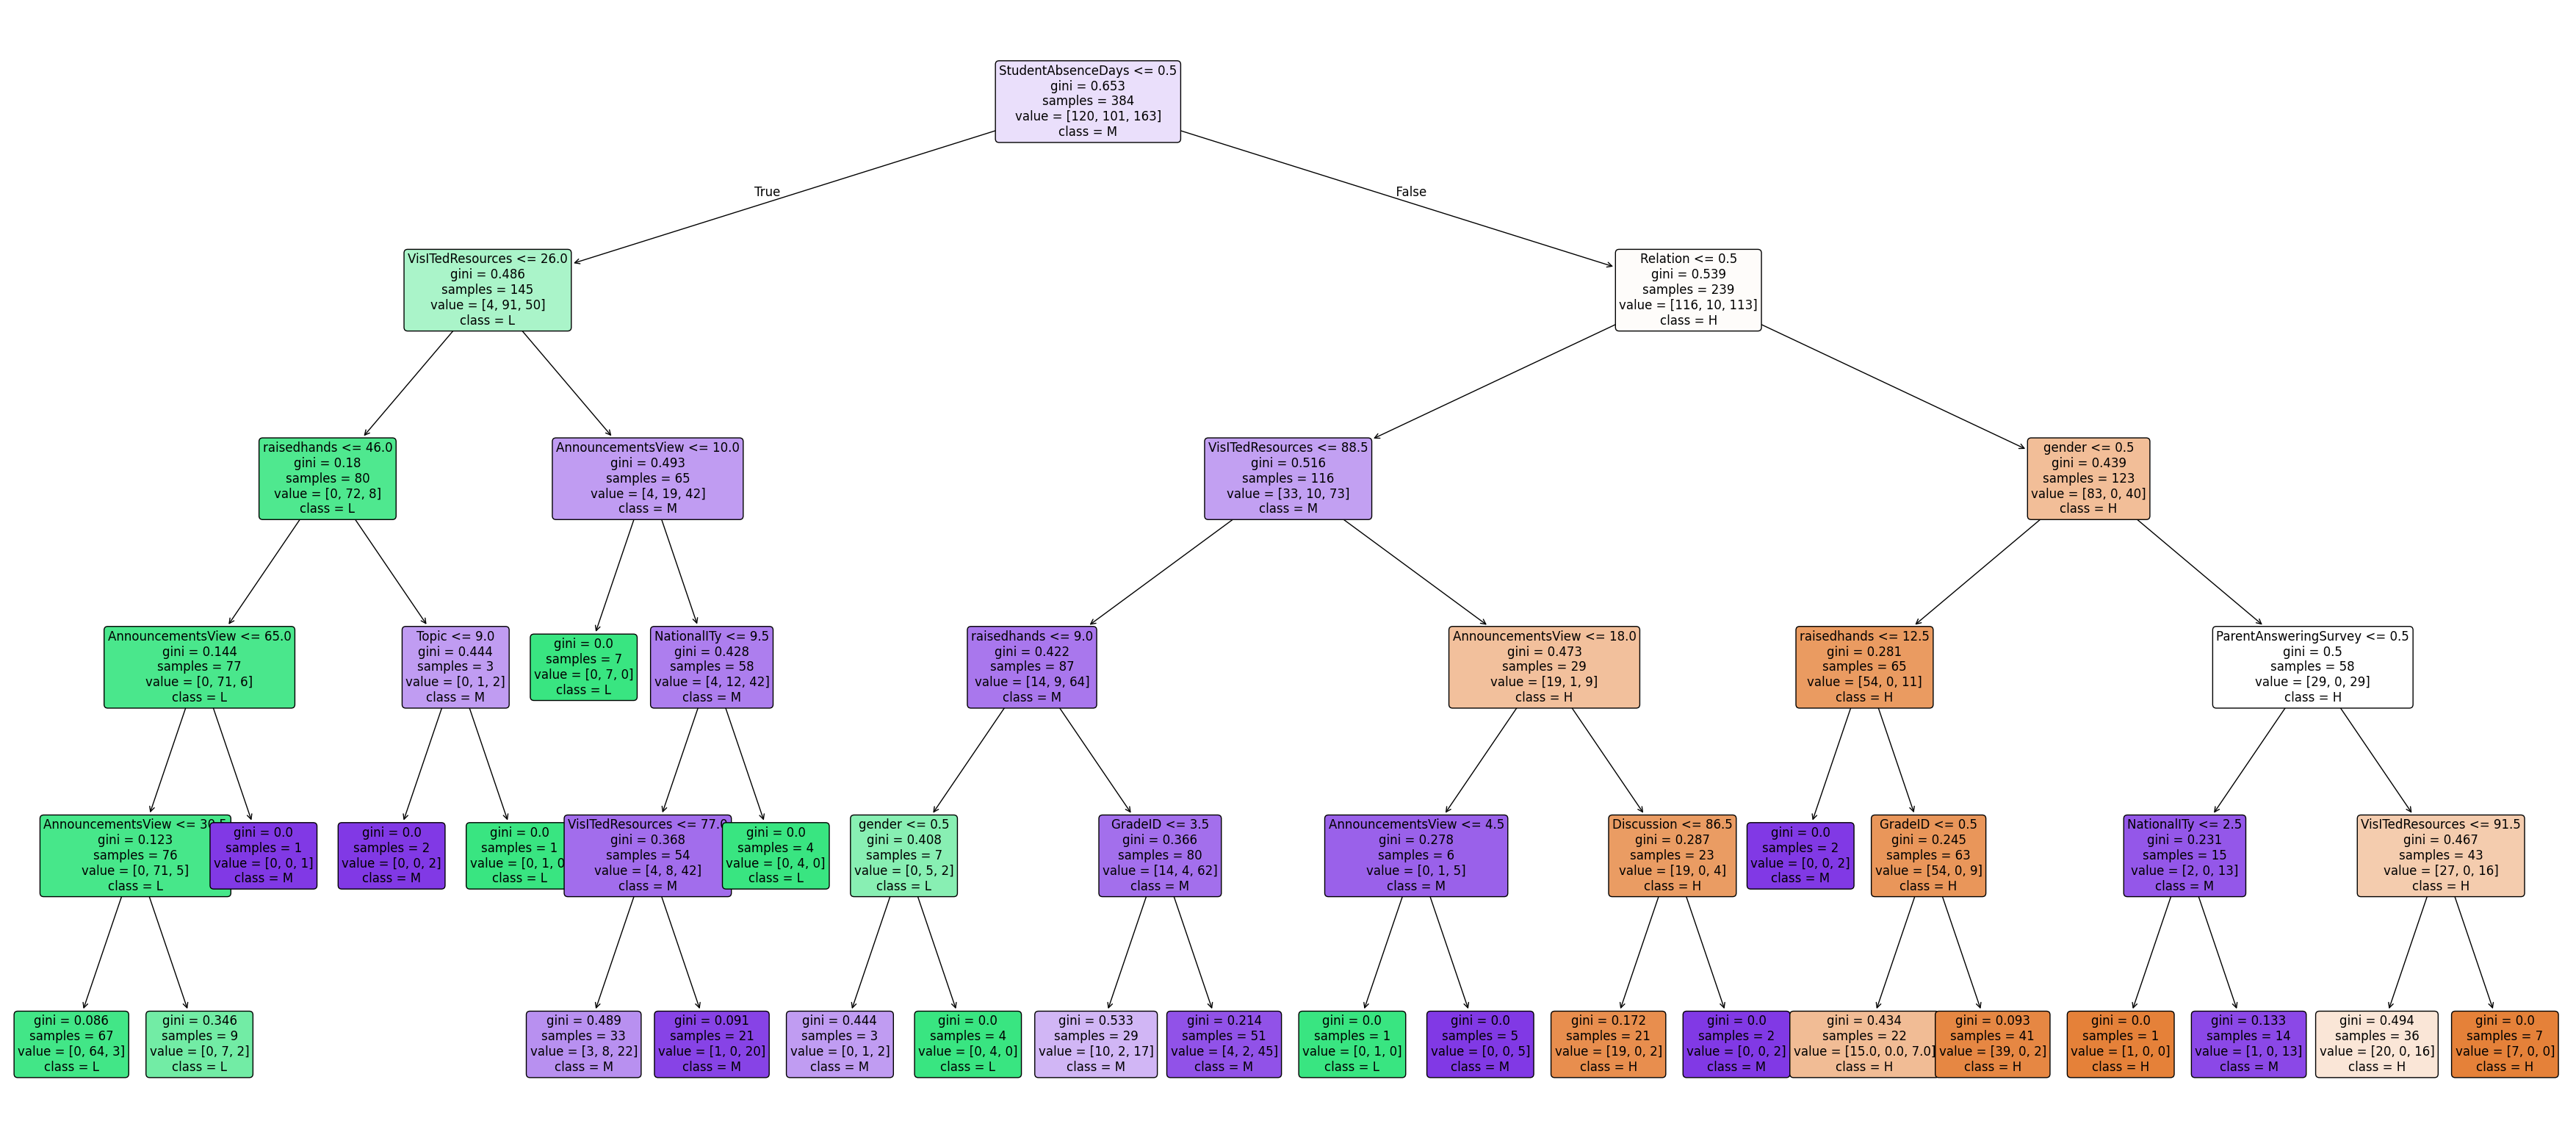

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


plt.figure(figsize=(45, 20))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=clf.classes_,
    filled=True,
    fontsize=12,
    rounded=True,
)

plt.show()